# Data Science Demo Project

In [47]:
# Required Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
# Loading data

df=pd.read_csv("C:\\Users\\Windows10 Pro\\OneDrive\\Desktop\\DS Notes-Chandan\\Dummy_data.csv")
print(df)

    Order ID Order Date CustomerName             State     City  Amount  \
0    B-26055  10-Mar-18    Harivansh     Uttar Pradesh  Mathura    5729   
1    B-25993   3-Feb-18       Madhav             Delhi    Delhi     610   
2    B-25973  24-Jan-18  Madan Mohan     Uttar Pradesh  Mathura     398   
3    B-25923  27-Dec-18        Gopal       Maharashtra   Mumbai    3873   
4    B-25757  21-Aug-18     Vishakha    Madhya Pradesh   Indore      17   
..       ...        ...          ...               ...      ...     ...   
495  B-25742   3-Aug-18       Ashwin               Goa      Goa      11   
496  B-26088  26-Mar-18       Bhavna            Sikkim  Gangtok      11   
497  B-25707   1-Jul-18      Shivani       Maharashtra   Mumbai       8   
498  B-25758  22-Aug-18      Shubham  Himachal Pradesh    Simla       8   
499  B-26095  28-Mar-18      Monisha         Rajasthan   Jaipur       6   

     Profit  Quantity     Category Sub-Category  PaymentMode   Latitude   \
0        64        14  

In [9]:
# Understanding data structure
print(df.shape)
print("---------------------------------")
print(df.dtypes)
print("---------------------------------")
print(df.info())
print("---------------------------------")

(500, 13)
---------------------------------
Order ID        object
Order Date      object
CustomerName    object
State           object
City            object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
Latitude        object
Longitude       object
dtype: object
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
 5   Amount        500 non-null    int64 
 6   Profit        500 non-null    int64 
 7   Quantity      500 non-null    int64 
 8   Category      500 non-null    object
 9   Sub-Category  500 non-null    object


Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Latitude        0
Longitude       0
dtype: int64
Visualize missing data


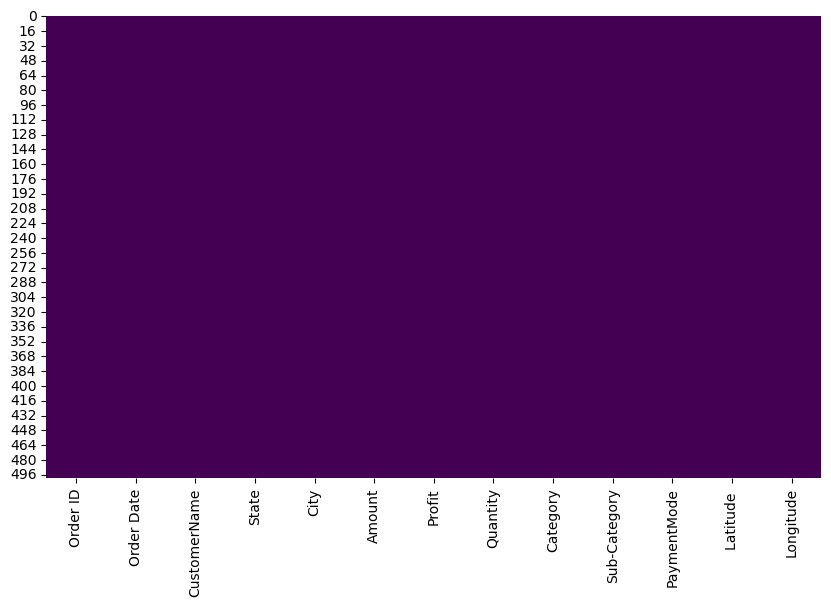

In [17]:
# Missing values
print(df.isnull().sum())
print("Visualize missing data")

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [19]:
# Handling Missing data - No Missing data
# Handling Inconsistent data - No Inconsistent data
# Normalizing or Scaling

numeric_data=df.select_dtypes(['float64', 'int64'])
scaler=StandardScaler()
scaled_data=(scaler.fit_transform(numeric_data))
print(scaled_data)

[[ 9.47703702  0.12547423  4.52609262]
 [ 0.40336793  0.80601241 -0.39746541]
 [ 0.02758792  0.34759433  1.84051551]
 ...
 [-0.66370548 -0.20534294 -1.29265778]
 [-0.66370548 -0.18643911 -1.29265778]
 [-0.66725058 -0.17226123 -1.29265778]]


In [24]:
# Dealing with Numeric data

encoder=OneHotEncoder()
encoded_data=(encoder.fit_transform([['Amount']]).toarray())
print(encoded_data)
encoded_data1=encoder.fit_transform([['Profit']]).toarray()
print(encoded_data1)

[[1.]]
[[1.]]


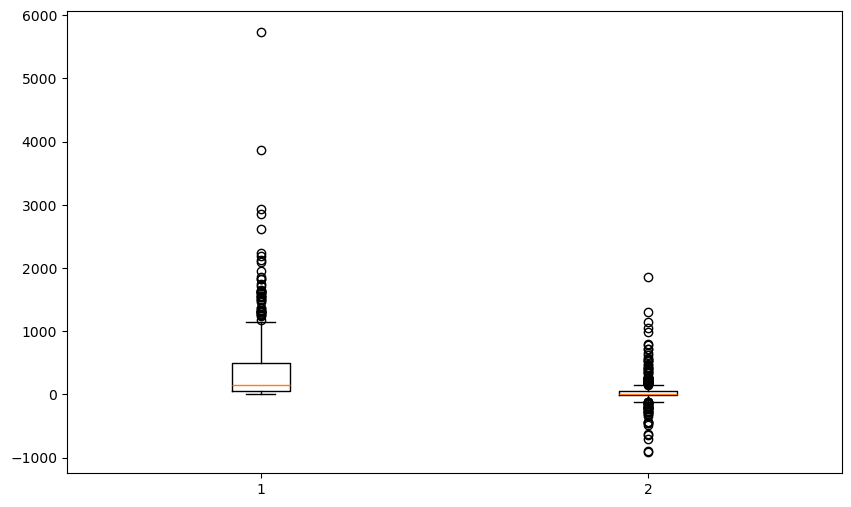

'\nplt.figure(figsize=(10, 6))\nplt.boxplot(df.select_dtypes(include=[float, int]).values)  # Select only numeric columns\nplt.show()\n'

In [31]:
# Visualize data
# Detect Outliers using box plot

plt.figure(figsize=(10,6))
plt.boxplot([df['Amount'], df['Profit']])
plt.show()
'''
plt.figure(figsize=(10, 6))
plt.boxplot(df.select_dtypes(include=[float, int]).values)  # Select only numeric columns
plt.show()
'''

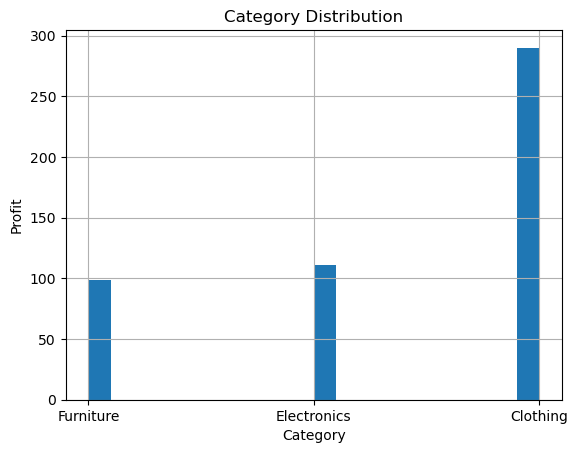

In [32]:
# Visualize Individual variables

df['Category'].hist(bins=20)
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

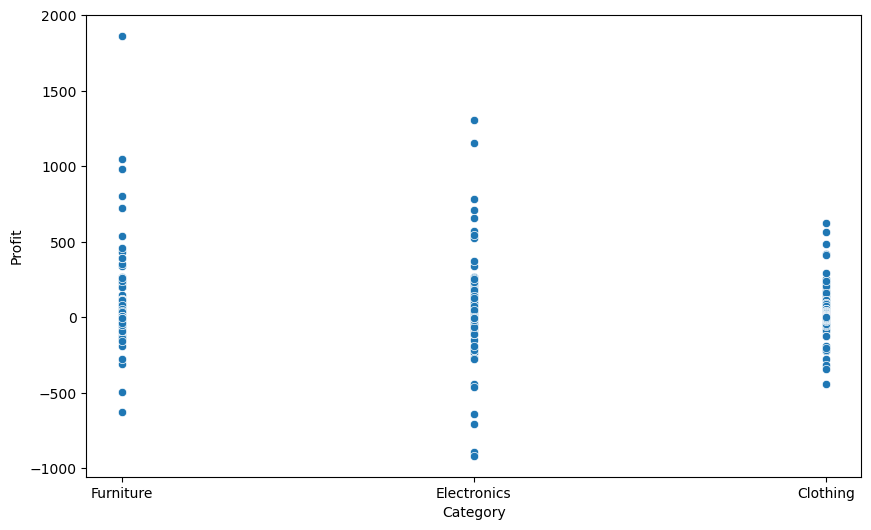

In [37]:
# Visualize multiple distributions

plt.figure(figsize=(10,6))
sns.scatterplot(x='Category', y='Profit', data=df)
plt.show()

<Figure size 1000x600 with 0 Axes>

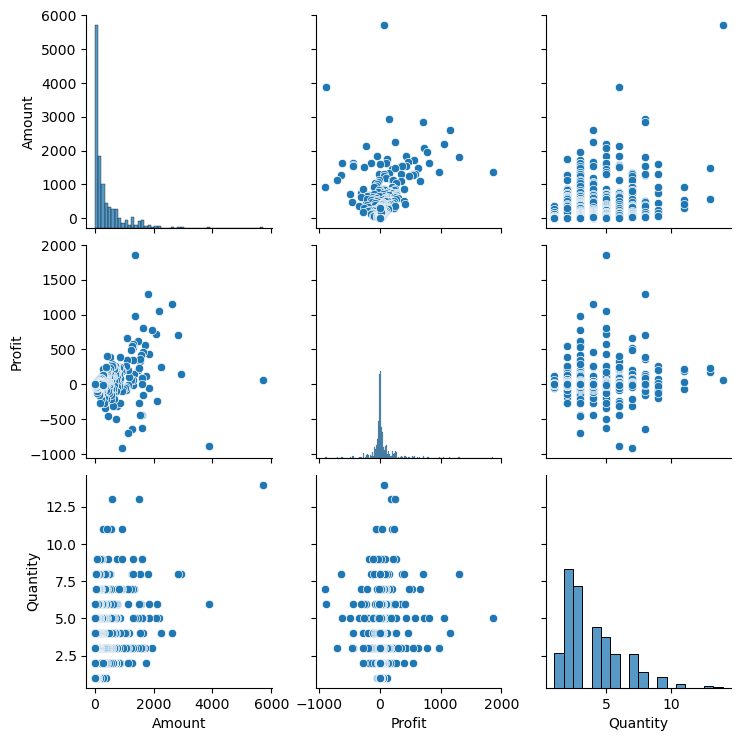

In [38]:
# Pairplot using Seaborn

plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

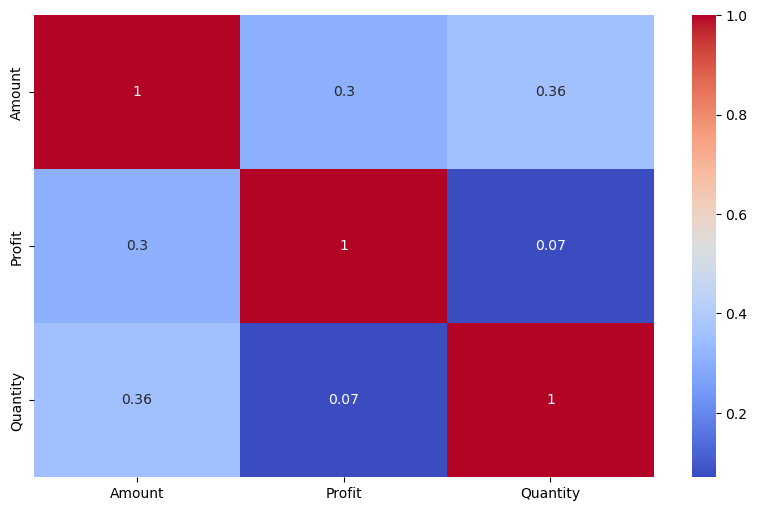

In [39]:
# Correlation Matrix

numeric_data=df.select_dtypes(['float64', 'int64'])
corr=numeric_data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [46]:
# Data Splitting

# Loading data
df=pd.read_csv("C:\\Users\\Windows10 Pro\\OneDrive\\Desktop\\DS Notes-Chandan\\Dummy_data.csv")

# Separate features (X), target (y)
X= df[['Amount', 'Profit']]
y= df['State']

# Split dataset into features and target
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print("Training Features: \n", X_train)
print("Test Features: \n", X_test)
print("Training Target: \n", y_train)
print("Test Target: \n", y_test)

Training Features: 
      Amount  Profit
249      67     -86
433      57      21
19      121      41
322     158     -63
332     151       9
..      ...     ...
106      83      12
270     259      47
348      27       4
435      13       3
102      27       0

[400 rows x 2 columns]
Test Features: 
      Amount  Profit
361     123      17
73       24       8
374     112      15
155      59     -30
104     182     -11
..      ...     ...
347     139      30
86     1052     -82
75     1120     199
438      54       8
15     2188    1050

[100 rows x 2 columns]
Training Target: 
 249     Uttar Pradesh
433           Gujarat
19              Bihar
322       West Bengal
332       Maharashtra
            ...      
106             Delhi
270    Madhya Pradesh
348               Goa
435               Goa
102           Gujarat
Name: State, Length: 400, dtype: object
Test Target: 
 361     Himachal Pradesh
73               Gujarat
374          Maharashtra
155    Jammu and Kashmir
104          Mahar

In [54]:
# Model Selection --- Choosing Random Forest Classification

# Model training
rf_classifier=RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model using fit function
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred=rf_classifier.predict(X_test)

# Evaluate the Model
accuracy=accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 11.00%


Confusion Matrix:
conf_matrix


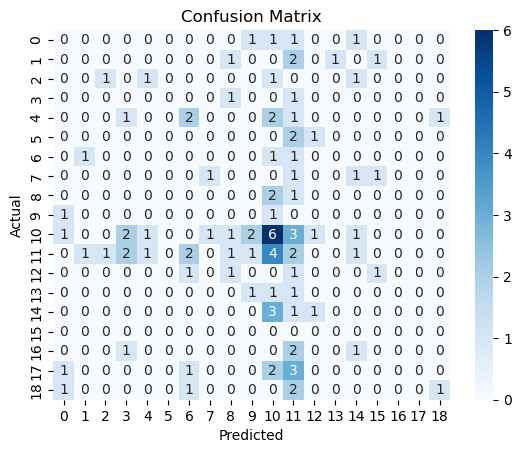

In [56]:
# Confusion Matrix
conf_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
print("Confusion Matrix:")
print("conf_matrix")